<a href="https://colab.research.google.com/github/HR-Analysis/AI-ML/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:


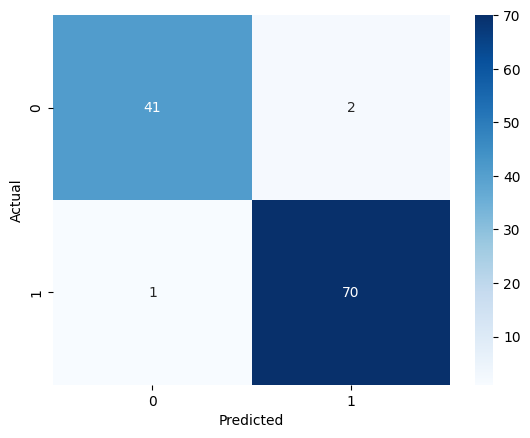


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.9974


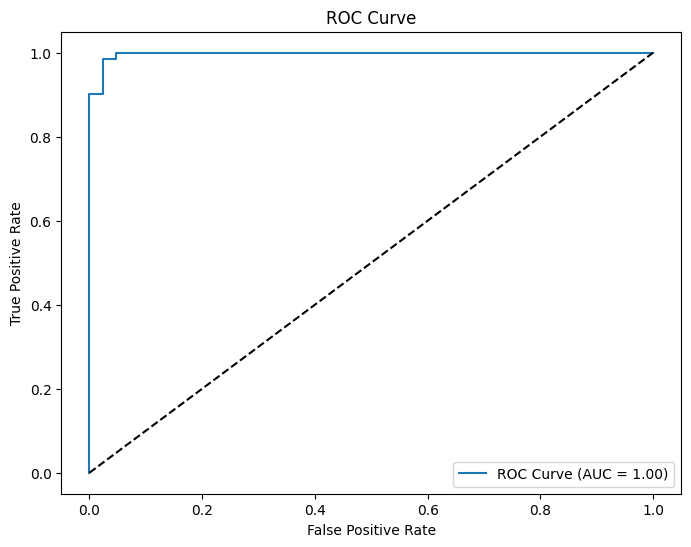


Confusion Matrix (Threshold = 0.6):


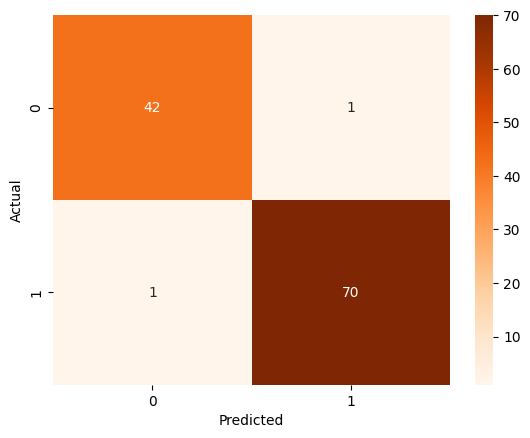

Precision (Threshold = 0.6): 0.9859
Recall (Threshold = 0.6): 0.9859

Sigmoid Function Example:
Sigmoid(0.5) = 0.6225
The sigmoid function converts any real-valued number into a probability between 0 and 1.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for class 1
y_pred = model.predict(X_test_scaled)


print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


custom_threshold = 0.6
y_pred_custom = (y_prob >= custom_threshold).astype(int)

print(f"\nConfusion Matrix (Threshold = {custom_threshold}):")
cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Precision (Threshold = {custom_threshold}): {precision_score(y_test, y_pred_custom):.4f}")
print(f"Recall (Threshold = {custom_threshold}): {recall_score(y_test, y_pred_custom):.4f}")


import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

print("\nSigmoid Function Example:")
z_value = 0.5
print(f"Sigmoid({z_value}) = {sigmoid(z_value):.4f}")
print("The sigmoid function converts any real-valued number into a probability between 0 and 1.")